# Mengimpor Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
data = pd.read_csv('responden.csv')

# Deskripsi Dataset

In [3]:
data.head()

,Timestamp,Mahasiswa UDINUS angkatan,Jenis kelamin,Apakah Anda tinggal di Semarang bersama keluarga?,Saya merasa kesulitan untuk bersantai setelah belajar dan mengerjakan tugas mata kuliah ini.,Saya merasa mulut saya kering saat memikirkan tugas-tugas dan ujian pada mata kuliah ini.,Saya merasa sulit untuk merasakan hal-hal positif terkait hasil belajar saya dalam mata kuliah ini.,"Saya mengalami kesulitan bernapas (misalnya, napas terasa cepat atau sesak, tanpa aktivitas fisik) ketika menghadapi soal mata kuliah ini.",Saya merasa sulit untuk memulai mengerjakan tugas-tugas Algoritma dan Pemrograman (Algoritma dan Struktur Data).,Saya merasa cenderung bereaksi berlebihan terhadap kesulitan atau tantangan dalam mata kuliah ini.,...,Saya merasa sulit untuk bersantai setelah mengikuti perkuliahan mata kuliah ini.,Saya merasa sedih dan murung ketika mengikuti mata kuliah ini.,Saya merasa tidak toleran terhadap hal-hal yang mengganggu fokus saya dalam menyelesaikan tugas-tugas pemrograman.,Saya merasa hampir panik saat menghadapi soal-soal pemrograman yang rumit.,Saya merasa tidak dapat bersemangat terhadap pembelajaran atau tugas-tugas pemrograman.,Saya merasa tidak berharga sebagai mahasiswa karena kesulitan saya dalam memahami materi Algoritma dan Pemrograman (Algoritma dan Struktur Data).,Saya merasa cukup sensitif dan mudah tersinggung ketika menghadapi kesulitan dalam tugas-tugas mata kuliah ini.,Saya sadar akan detak jantung saya meskipun tanpa aktivitas fisik ketika menghadapi ujian.,Saya merasa takut tanpa alasan jelas ketika memikirkan mata kuliah ini.,Saya merasa hidup ini tidak bermakna karena kesulitan saya dalam mata kuliah ini.
0,2024/10/01 3:33:47 PM GMT+7,2021,Perempuan,NaN,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,2024/10/01 3:39:52 PM GMT+7,2021,Laki-laki,NaN,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2024/10/01 3:42:26 PM GMT+7,2021,Laki-laki,NaN,0,0,1,0,2,2,...,0,0,0,1,1,0,0,0,1,0
3,2024/10/01 3:54:31 PM GMT+7,2023,Laki-laki,NaN,0,2,1,3,3,2,...,0,0,0,2,1,0,2,1,2,1
4,2024/10/03 4:57:15 PM GMT+7,2021,Perempuan,Tidak,1,1,2,0,2,2,...,1,0,0,2,2,0,2,2,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 25 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   Timestamp                                                                                                                                            206 non-null    object
 1   Mahasiswa UDINUS angkatan                                                                                                                            206 non-null    int64 
 2   Jenis kelamin                                                                                                                                        206 non-null    object
 3   Apaka

In [5]:
data = data.drop(['Timestamp'], axis=1)

In [6]:
# Mengganti nama kolom menjadi lebih singkat
data = data.rename(columns={'Mahasiswa UDINUS angkatan': 'angkatan'})
data = data.rename(columns={'Jenis kelamin': 'jenis_kelamin'})
data = data.rename(columns={'Apakah Anda tinggal di Semarang bersama keluarga?  ': 'tinggal_dengan_keluarga'})
data = data.rename(columns={'Saya merasa kesulitan untuk bersantai setelah belajar dan mengerjakan tugas mata kuliah ini.': 'pertanyaan1'})
data = data.rename(columns={'Saya merasa mulut saya kering saat memikirkan tugas-tugas dan ujian pada mata kuliah ini.': 'pertanyaan2'})
data = data.rename(columns={'Saya merasa sulit untuk merasakan hal-hal positif terkait hasil belajar saya dalam mata kuliah ini.  ': 'pertanyaan3'})
data = data.rename(columns={'Saya mengalami kesulitan bernapas (misalnya, napas terasa cepat atau sesak, tanpa aktivitas fisik) ketika menghadapi soal mata kuliah ini.': 'pertanyaan4'})
data = data.rename(columns={'Saya merasa sulit untuk memulai mengerjakan tugas-tugas Algoritma dan Pemrograman  (Algoritma dan Struktur Data).  ': 'pertanyaan5'})
data = data.rename(columns={'Saya merasa cenderung bereaksi berlebihan terhadap kesulitan atau tantangan dalam mata kuliah ini.  ': 'pertanyaan6'})
data = data.rename(columns={'Saya mengalami gemetar (misalnya, di tangan) saat mengerjakan soal-soal pemrograman yang sulit.  ': 'pertanyaan7'})
data = data.rename(columns={'Saya merasa menggunakan banyak energi karena stres saat belajar atau mengerjakan tugas Algoritma dan Pemrograman (Algoritma dan Struktur Data).': 'pertanyaan8'})
data = data.rename(columns={'Saya merasa khawatir akan panik dan melakukan kesalahan saat menyelesaikan tugas atau ujian pemrograman.  ': 'pertanyaan9'})
data = data.rename(columns={'Saya merasa tidak ada hal yang saya nantikan terkait kemajuan saya di mata kuliah ini.  ': 'pertanyaan10'})
data = data.rename(columns={'Saya merasa sering merasa gelisah saat menghadapi tugas-tugas Algoritma dan Pemrograman (Algoritma dan Struktur Data).  ': 'pertanyaan11'})
data = data.rename(columns={'Saya merasa sulit untuk bersantai setelah mengikuti perkuliahan mata kuliah ini.  ': 'pertanyaan12'})
data = data.rename(columns={'Saya merasa sedih dan murung ketika mengikuti mata kuliah ini.': 'pertanyaan13'})
data = data.rename(columns={'Saya merasa tidak toleran terhadap hal-hal yang mengganggu fokus saya dalam menyelesaikan tugas-tugas pemrograman.  ': 'pertanyaan14'})
data = data.rename(columns={'Saya merasa hampir panik saat menghadapi soal-soal pemrograman yang rumit.  ': 'pertanyaan15'})
data = data.rename(columns={'Saya merasa tidak dapat bersemangat terhadap pembelajaran atau tugas-tugas pemrograman.  ': 'pertanyaan16'})
data = data.rename(columns={'Saya merasa tidak berharga sebagai mahasiswa karena kesulitan saya dalam memahami materi Algoritma dan Pemrograman (Algoritma dan Struktur Data).  ': 'pertanyaan17'})
data = data.rename(columns={'Saya merasa cukup sensitif dan mudah tersinggung ketika menghadapi kesulitan dalam tugas-tugas mata kuliah ini.  ': 'pertanyaan18'})
data = data.rename(columns={'Saya sadar akan detak jantung saya meskipun tanpa aktivitas fisik ketika menghadapi ujian.': 'pertanyaan19'})
data = data.rename(columns={'Saya merasa takut tanpa alasan jelas ketika memikirkan mata kuliah ini.': 'pertanyaan20'})
data = data.rename(columns={'Saya merasa hidup ini tidak bermakna karena kesulitan saya dalam mata kuliah ini.': 'pertanyaan21'})

In [7]:
# Menghitung jumlah seluruh data
jumlah_data = len(data)  

print(f"Jumlah seluruh data: {jumlah_data}")

Jumlah seluruh data: 206


In [8]:
# Menghitung jumlah nilai kosong di kolom 'tinggal_dengan_keluarga'
jumlah_kosong = data['tinggal_dengan_keluarga'].isna().sum()

# Menampilkan jumlah data dengan nilai kosong
print("Jumlah nilai kosong di kolom 'tinggal_dengan_keluarga':", jumlah_kosong)

Jumlah nilai kosong di kolom 'tinggal_dengan_keluarga': 4


In [9]:
# Menghapus baris dengan nilai kosong di kolom 'tinggal_dengan_keluarga'
data = data.dropna(subset=['tinggal_dengan_keluarga'])

# Menampilkan beberapa baris pertama untuk memastikan baris kosong telah dihapus
data.head()

,angkatan,jenis_kelamin,tinggal_dengan_keluarga,pertanyaan1,pertanyaan2,pertanyaan3,pertanyaan4,pertanyaan5,pertanyaan6,pertanyaan7,...,pertanyaan12,pertanyaan13,pertanyaan14,pertanyaan15,pertanyaan16,pertanyaan17,pertanyaan18,pertanyaan19,pertanyaan20,pertanyaan21
4,2021,Perempuan,Tidak,1,1,2,0,2,2,1,...,1,0,0,2,2,0,2,2,1,1
5,2021,Perempuan,Tidak,0,0,1,1,2,1,0,...,0,0,1,2,1,3,1,1,1,0
6,2021,Perempuan,Ya,0,0,1,0,2,1,0,...,0,0,1,1,1,0,1,2,2,0
7,2021,Laki-laki,Ya,1,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
8,2022,Laki-laki,Tidak,2,2,2,2,0,2,1,...,2,3,3,3,0,1,1,3,0,3


In [10]:
# Menghitung jumlah seluruh data
jumlah_data = len(data)  # Menggunakan fungsi len

print(f"Jumlah seluruh data: {jumlah_data}")

Jumlah seluruh data: 202


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 4 to 205
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   angkatan                 202 non-null    int64 
 1   jenis_kelamin            202 non-null    object
 2   tinggal_dengan_keluarga  202 non-null    object
 3   pertanyaan1              202 non-null    int64 
 4   pertanyaan2              202 non-null    int64 
 5   pertanyaan3              202 non-null    int64 
 6   pertanyaan4              202 non-null    int64 
 7   pertanyaan5              202 non-null    int64 
 8   pertanyaan6              202 non-null    int64 
 9   pertanyaan7              202 non-null    int64 
 10  pertanyaan8              202 non-null    int64 
 11  pertanyaan9              202 non-null    int64 
 12  pertanyaan10             202 non-null    int64 
 13  pertanyaan11             202 non-null    int64 
 14  pertanyaan12             202 non-null    int64 

<Axes: >

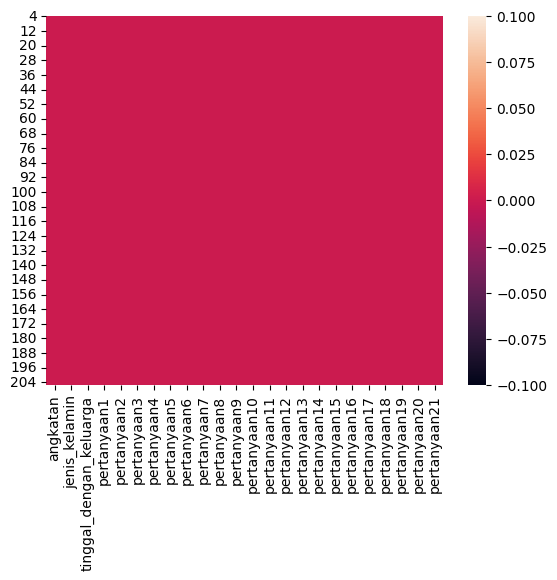

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.head()

,angkatan,jenis_kelamin,tinggal_dengan_keluarga,pertanyaan1,pertanyaan2,pertanyaan3,pertanyaan4,pertanyaan5,pertanyaan6,pertanyaan7,...,pertanyaan12,pertanyaan13,pertanyaan14,pertanyaan15,pertanyaan16,pertanyaan17,pertanyaan18,pertanyaan19,pertanyaan20,pertanyaan21
4,2021,Perempuan,Tidak,1,1,2,0,2,2,1,...,1,0,0,2,2,0,2,2,1,1
5,2021,Perempuan,Tidak,0,0,1,1,2,1,0,...,0,0,1,2,1,3,1,1,1,0
6,2021,Perempuan,Ya,0,0,1,0,2,1,0,...,0,0,1,1,1,0,1,2,2,0
7,2021,Laki-laki,Ya,1,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
8,2022,Laki-laki,Tidak,2,2,2,2,0,2,1,...,2,3,3,3,0,1,1,3,0,3


# Menghitung skor depresi, kecemasan, dan stres

In [14]:
# Menghitung skor depresi, kecemasan, dan stres
data['skor_depresi'] = (data['pertanyaan3'] + data['pertanyaan5'] + data['pertanyaan10'] + data['pertanyaan13'] + data['pertanyaan16'] + data['pertanyaan17'] + data['pertanyaan21']) * 2
data['skor_kecemasan'] = (data['pertanyaan2'] + data['pertanyaan4'] + data['pertanyaan7'] + data['pertanyaan9'] + data['pertanyaan15'] + data['pertanyaan19'] + data['pertanyaan20']) * 2
data['skor_stres'] = (data['pertanyaan1'] + data['pertanyaan6'] + data['pertanyaan8'] + data['pertanyaan11'] + data['pertanyaan12'] + data['pertanyaan14'] + data['pertanyaan18']) * 2

In [15]:
data.head()

,angkatan,jenis_kelamin,tinggal_dengan_keluarga,pertanyaan1,pertanyaan2,pertanyaan3,pertanyaan4,pertanyaan5,pertanyaan6,pertanyaan7,...,pertanyaan15,pertanyaan16,pertanyaan17,pertanyaan18,pertanyaan19,pertanyaan20,pertanyaan21,skor_depresi,skor_kecemasan,skor_stres
4,2021,Perempuan,Tidak,1,1,2,0,2,2,1,...,2,2,0,2,2,1,1,16,16,18
5,2021,Perempuan,Tidak,0,0,1,1,2,1,0,...,2,1,3,1,1,1,0,16,16,18
6,2021,Perempuan,Ya,0,0,1,0,2,1,0,...,1,1,0,1,2,2,0,10,12,12
7,2021,Laki-laki,Ya,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,6,4,4
8,2022,Laki-laki,Tidak,2,2,2,2,0,2,1,...,3,0,1,1,3,0,3,24,24,32


# Menghapus kolom Pertanyaan1 sampai Pertanyaan21

In [16]:
data = data.drop(['pertanyaan1', 'pertanyaan2', 'pertanyaan3', 'pertanyaan4', 'pertanyaan5', 'pertanyaan6', 'pertanyaan7',
                  'pertanyaan8', 'pertanyaan9', 'pertanyaan10', 'pertanyaan11', 'pertanyaan12', 'pertanyaan13', 'pertanyaan14',
                  'pertanyaan15', 'pertanyaan16', 'pertanyaan17', 'pertanyaan18', 'pertanyaan19', 'pertanyaan20', 'pertanyaan21'
                  ], axis=1)

In [17]:
data.head()

,angkatan,jenis_kelamin,tinggal_dengan_keluarga,skor_depresi,skor_kecemasan,skor_stres
4,2021,Perempuan,Tidak,16,16,18
5,2021,Perempuan,Tidak,16,16,18
6,2021,Perempuan,Ya,10,12,12
7,2021,Laki-laki,Ya,6,4,4
8,2022,Laki-laki,Tidak,24,24,32


# Mengklasifikasikan skor depresi menjadi kategori sesuai panduan DASS-21

In [18]:
# Mengklasifikasikan skor depresi menjadi kategori sesuai panduan DASS-21
def kategori_depresi(skor):
    if skor <= 9:
        return 'Normal'
    elif skor <= 13:
        return 'Ringan'
    elif skor <= 20:
        return 'Sedang'
    elif skor <= 27:
        return 'Parah'
    else:
        return 'Sangat Parah'

In [19]:
# Menambahkan kolom kategori depresi
data['kategori_depresi'] = data['skor_depresi'].apply(kategori_depresi)

In [20]:
data.head()

,angkatan,jenis_kelamin,tinggal_dengan_keluarga,skor_depresi,skor_kecemasan,skor_stres,kategori_depresi
4,2021,Perempuan,Tidak,16,16,18,Sedang
5,2021,Perempuan,Tidak,16,16,18,Sedang
6,2021,Perempuan,Ya,10,12,12,Ringan
7,2021,Laki-laki,Ya,6,4,4,Normal
8,2022,Laki-laki,Tidak,24,24,32,Parah


# Split Data dan Buat Model Regresi

In [21]:
# Memisahkan data menjadi variabel independen (X) dan dependen (y)
X = data[['skor_stres', 'skor_kecemasan']]  # Variabel independen
y = data['skor_depresi']                    # Variabel dependen

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi hasil pada data pengujian
y_pred = model.predict(X_test)

# Menambahkan hasil prediksi ke data uji
data_test = X_test.copy()
data_test['skor_depresi_aktual'] = y_test
data_test['skor_depresi_prediksi'] = y_pred

# Mengkategorikan hasil prediksi
data_test['kategori_prediksi'] = data_test['skor_depresi_prediksi'].apply(kategori_depresi)

# Grafik nilai aktual tingkat depresi


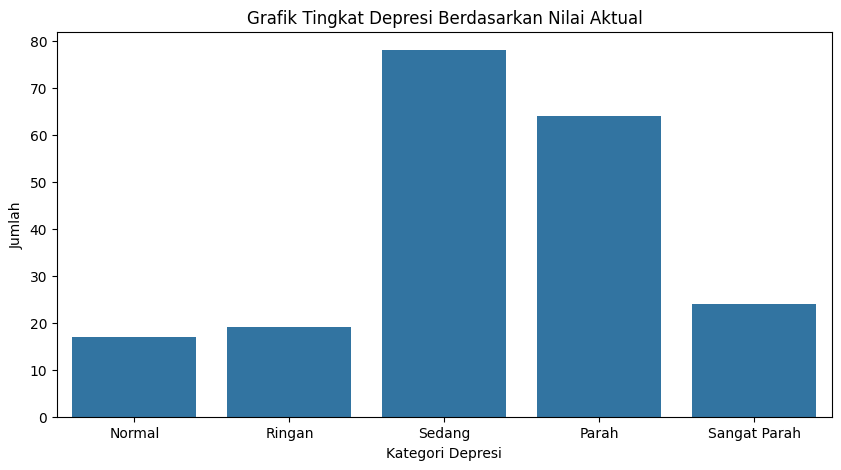

In [22]:
# Plot grafik tingkat depresi berdasarkan nilai aktual
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='kategori_depresi', order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'])
plt.title('Grafik Tingkat Depresi Berdasarkan Nilai Aktual')
plt.xlabel('Kategori Depresi')
plt.ylabel('Jumlah')
plt.show()

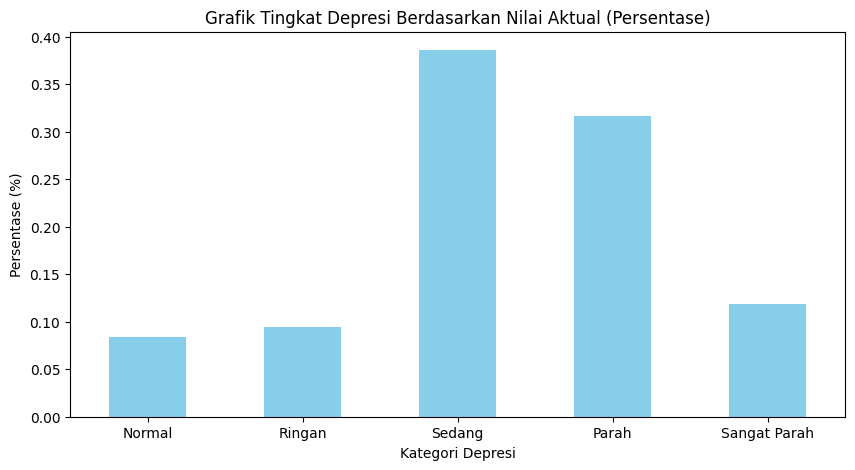

In [23]:
# Plot grafik tingkat depresi berdasarkan nilai aktual dalam persentase
plt.figure(figsize=(10, 5))
data['kategori_depresi'].value_counts(normalize=True).reindex(['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']).plot(kind='bar', color='skyblue')
plt.title('Grafik Tingkat Depresi Berdasarkan Nilai Aktual (Persentase)')
plt.xlabel('Kategori Depresi')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.show()

# Grafik prediksi tingkat depresi

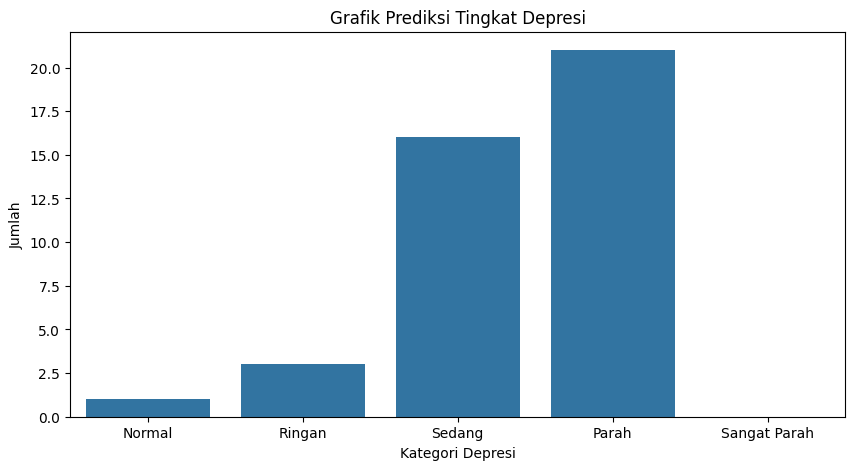

In [24]:
# Plot grafik tingkat depresi berdasarkan prediksi
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='kategori_prediksi', order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'])
plt.title('Grafik Prediksi Tingkat Depresi')
plt.xlabel('Kategori Depresi')
plt.ylabel('Jumlah')
plt.show()

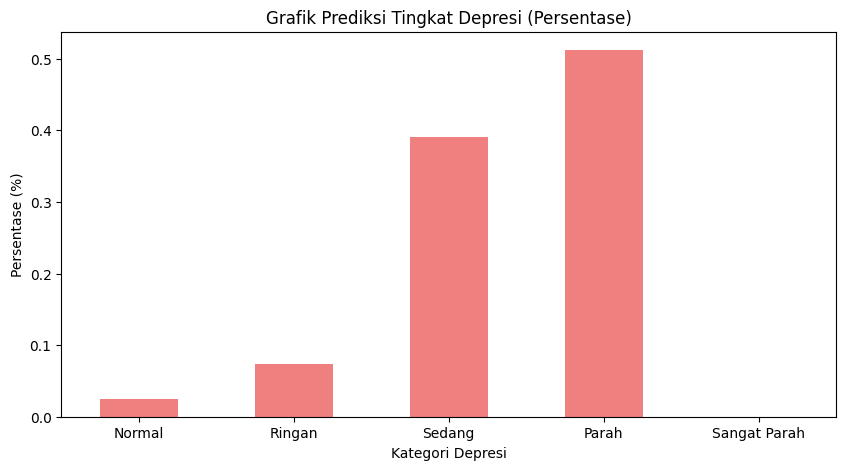

In [25]:
# Plot grafik tingkat depresi berdasarkan prediksi dalam persentase
plt.figure(figsize=(10, 5))
data_test['kategori_prediksi'].value_counts(normalize=True).reindex(['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']).plot(kind='bar', color='lightcoral')
plt.title('Grafik Prediksi Tingkat Depresi (Persentase)')
plt.xlabel('Kategori Depresi')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.show()

# Grafik nilai aktual tingkat depresi berdasarkan angkatan

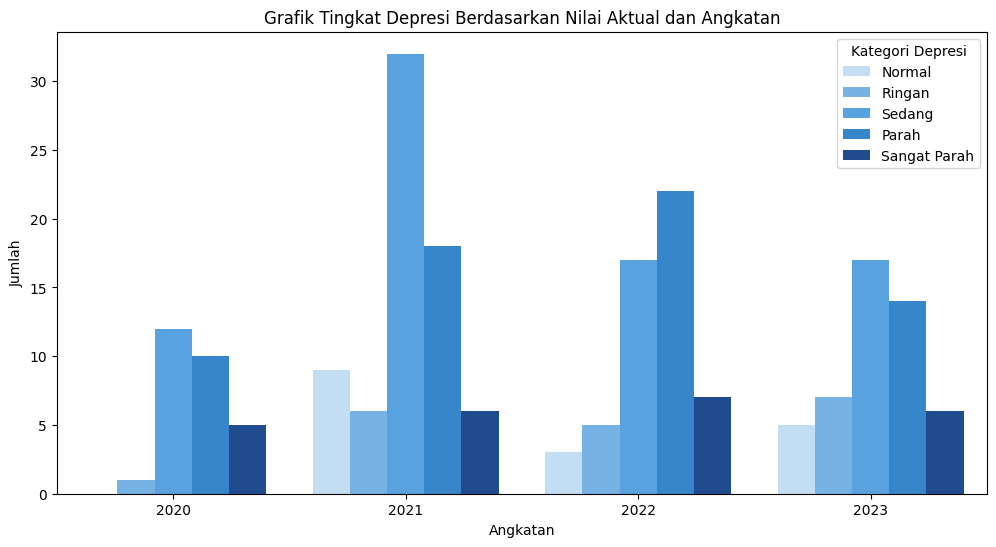

In [26]:
# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda untuk kategori "Normal"
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua untuk kategori "Ringan"
    'Sedang': '#42A5F5',       # Biru sedang untuk kategori "Sedang"
    'Parah': '#1E88E5',        # Biru lebih tua untuk kategori "Parah"
    'Sangat Parah': '#0D47A1'  # Biru tua untuk kategori "Sangat Parah"
}

# Plot grafik tingkat depresi berdasarkan nilai aktual dan angkatan dengan warna gradasi biru
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='angkatan', hue='kategori_depresi', order=sorted(data['angkatan'].unique()),
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'], palette=palette_colors)
plt.title('Grafik Tingkat Depresi Berdasarkan Nilai Aktual dan Angkatan')
plt.xlabel('Angkatan')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

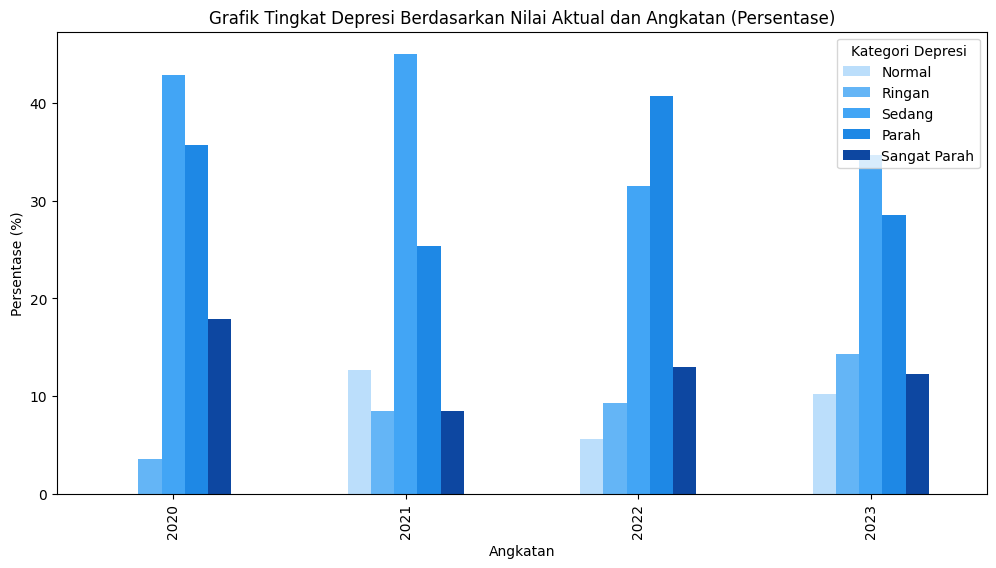

In [27]:
# Menghitung persentase tiap kategori dalam angkatan untuk data aktual
data_aktual_percent = data.groupby(['angkatan', 'kategori_depresi']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()

# Reset indeks untuk menghilangkan multi-level indexing pada angkatan
data_aktual_percent = data_aktual_percent.reset_index(level=0)

# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru tua
}

# Pastikan semua kategori selalu ada di indeks kolom
data_aktual_percent = data_aktual_percent.reindex(columns=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'], fill_value=0)

# Plot hasil persentase dengan gradasi biru
data_aktual_percent.plot(kind='bar', stacked=False, figsize=(12, 6), color=[palette_colors[k] for k in ['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']])
plt.title('Grafik Tingkat Depresi Berdasarkan Nilai Aktual dan Angkatan (Persentase)')
plt.xlabel('Angkatan')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik prediksi tingkat depresi berdasarkan angkatan

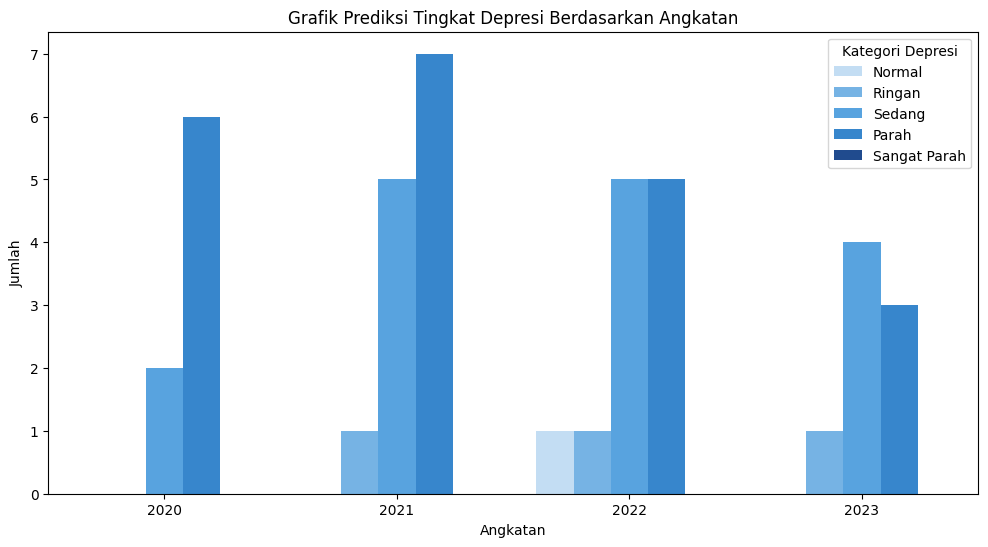

In [28]:
# Filter angkatan dan kolom yang akan digunakan
urut_angkatan = [2020, 2021, 2022, 2023]  # Angkatan yang diinginkan, tanpa 2024
data = data[data['angkatan'] != 2024]  # Hapus angkatan 2024

# Tentukan variabel independen dan dependen, serta sertakan 'angkatan' untuk referensi
X = data[['skor_stres', 'skor_kecemasan', 'angkatan']]
y = data['skor_depresi']

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train[['skor_stres', 'skor_kecemasan']], y_train)  # Latih model tanpa kolom 'angkatan'

# Memprediksi hasil pada data pengujian
y_pred = model.predict(X_test[['skor_stres', 'skor_kecemasan']])

# Menggabungkan hasil prediksi dengan kolom lain di X_test
data_test = X_test.copy()
data_test['skor_depresi_aktual'] = y_test
data_test['skor_depresi_prediksi'] = y_pred

# Fungsi kategorisasi untuk skor depresi
def kategori_depresi(skor):
    if skor <= 9:
        return 'Normal'
    elif skor <= 13:
        return 'Ringan'
    elif skor <= 20:
        return 'Sedang'
    elif skor <= 27:
        return 'Parah'
    else:
        return 'Sangat Parah'

# Terapkan fungsi kategori pada data prediksi
data_test['kategori_prediksi'] = data_test['skor_depresi_prediksi'].apply(kategori_depresi)

# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru tua
}

# Grafik prediksi tingkat depresi berdasarkan angkatan (jumlah absolut)
plt.figure(figsize=(12, 6))
sns.countplot(data=data_test, x='angkatan', hue='kategori_prediksi', order=urut_angkatan, 
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'], palette=palette_colors)
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Angkatan')
plt.xlabel('Angkatan')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

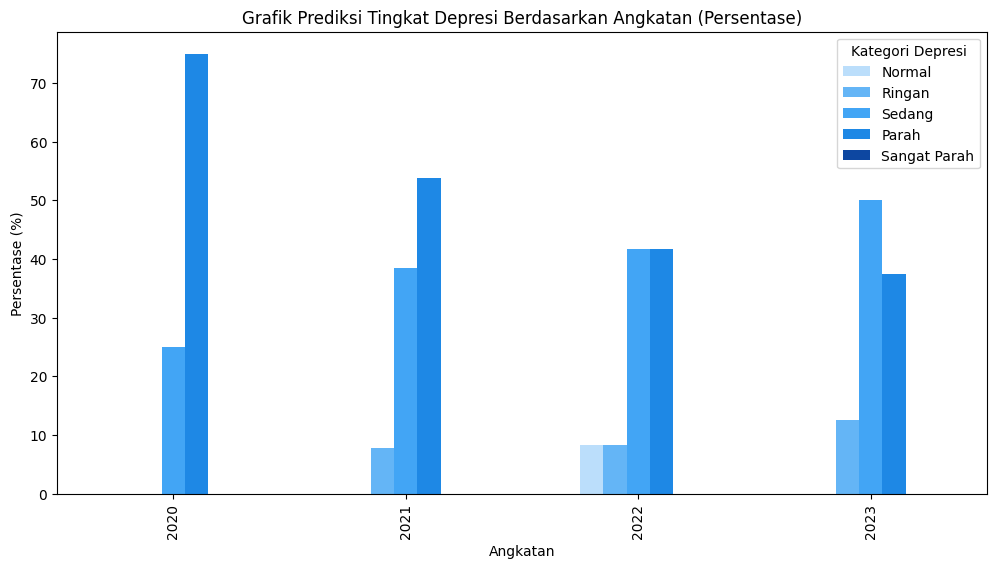

In [29]:
# Grafik prediksi tingkat depresi berdasarkan angkatan (persentase)
data_pred_percent = data_test.groupby(['angkatan', 'kategori_prediksi']).size().unstack().fillna(0)
data_pred_percent = data_pred_percent.div(data_pred_percent.sum(axis=1), axis=0) * 100

# Pastikan semua kategori selalu ada di indeks kolom
data_pred_percent = data_pred_percent.reindex(columns=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'], fill_value=0)

# Plot hasil persentase dengan gradasi biru
data_pred_percent.plot(kind='bar', stacked=False, figsize=(12, 6), color=[palette_colors[k] for k in ['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']])
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Angkatan (Persentase)')
plt.xlabel('Angkatan')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik nilai aktual tingkat depresi berdasarkan jenis kelamin

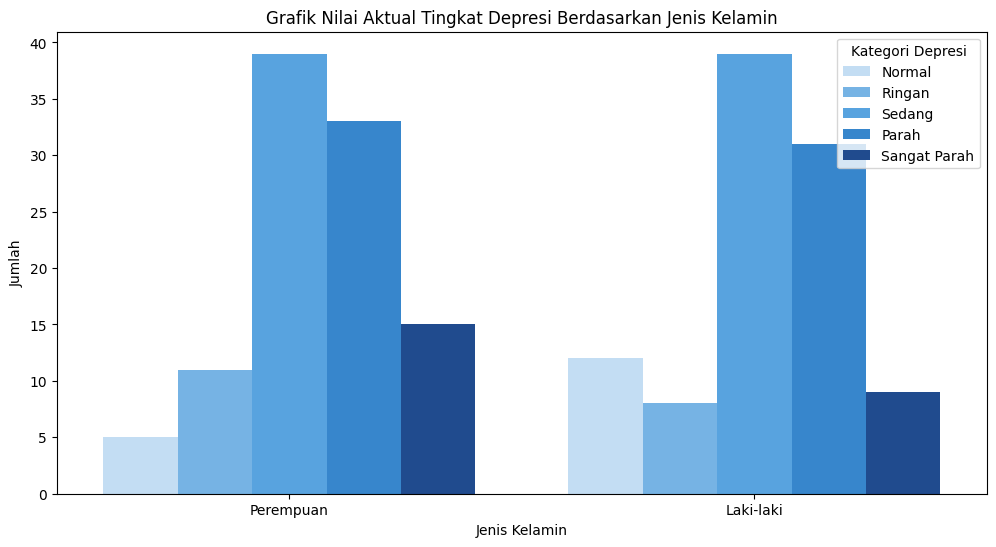

In [30]:
# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru paling tua
}

# Grafik nilai aktual tingkat depresi berdasarkan jenis kelamin
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='jenis_kelamin', hue='kategori_depresi',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette=palette_colors)
plt.title('Grafik Nilai Aktual Tingkat Depresi Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()


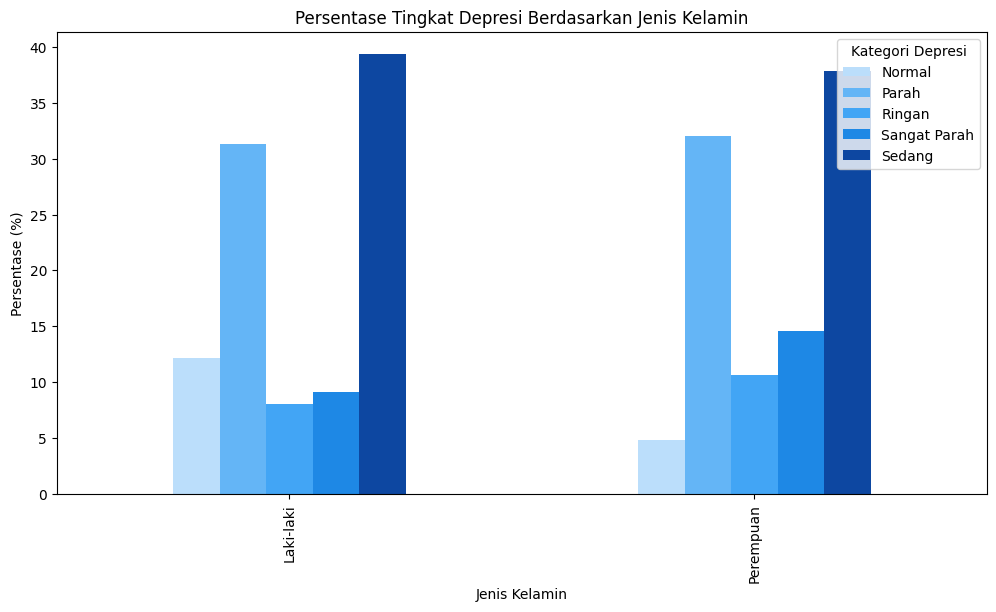

In [31]:
# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru paling tua
}

# Menghitung persentase kategori depresi berdasarkan jenis kelamin
data_percent = data.groupby(['jenis_kelamin', 'kategori_depresi']).size().unstack().fillna(0)
data_percent = data_percent.div(data_percent.sum(axis=1), axis=0) * 100  # Konversi ke persentase

# Plot hasil persentase dengan gradasi biru
data_percent.plot(kind='bar', stacked=False, figsize=(12, 6), color=[palette_colors[k] for k in ['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']])
plt.title('Persentase Tingkat Depresi Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik prediksi tingkat depresi berdasarkan jenis kelamin

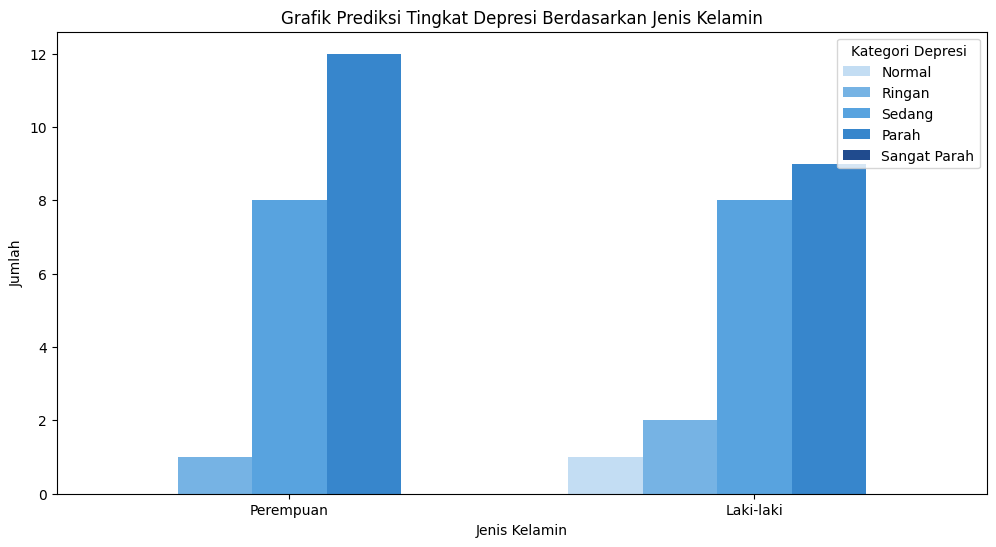

In [32]:
# Filter data dan kolom yang digunakan
X = data[['skor_stres', 'skor_kecemasan', 'jenis_kelamin', 'angkatan']]
y = data['skor_depresi']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Latih model tanpa kolom 'jenis_kelamin' dan 'angkatan'
model.fit(X_train[['skor_stres', 'skor_kecemasan']], y_train)

# Memprediksi skor depresi
y_pred = model.predict(X_test[['skor_stres', 'skor_kecemasan']])

# Gabungkan hasil prediksi dengan kolom lainnya di X_test
data_test = X_test.copy()
data_test['skor_depresi_aktual'] = y_test
data_test['skor_depresi_prediksi'] = y_pred

# Kategorikan prediksi
data_test['kategori_prediksi'] = data_test['skor_depresi_prediksi'].apply(kategori_depresi)

# Grafik prediksi tingkat depresi berdasarkan jenis kelamin
plt.figure(figsize=(12, 6))
sns.countplot(data=data_test, x='jenis_kelamin', hue='kategori_prediksi',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette=palette_colors)
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

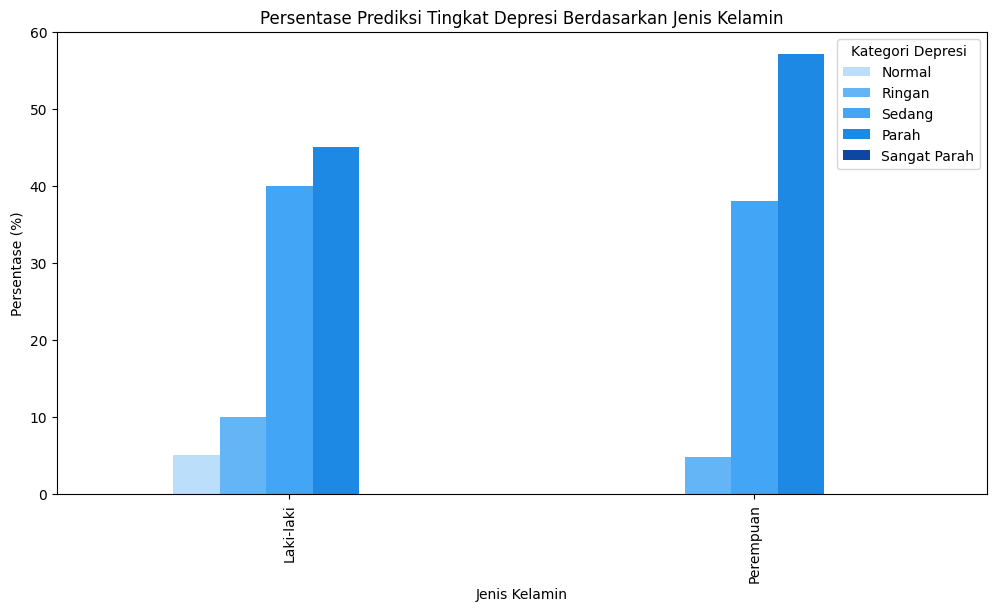

In [33]:
# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru paling tua
}

# Menghitung persentase kategori prediksi berdasarkan jenis kelamin
data_pred_percent = data_test.groupby(['jenis_kelamin', 'kategori_prediksi']).size().unstack().fillna(0)
data_pred_percent = data_pred_percent.div(data_pred_percent.sum(axis=1), axis=0) * 100  # Konversi ke persentase

# Pastikan kategori urut dan semua kategori ada, meskipun nilai nol
data_pred_percent = data_pred_percent.reindex(columns=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'], fill_value=0)

# Plot hasil persentase dengan gradasi biru
data_pred_percent.plot(kind='bar', stacked=False, figsize=(12, 6), color=[palette_colors[k] for k in ['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']])
plt.title('Persentase Prediksi Tingkat Depresi Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()


# Grafik nilai aktual tingkat depresi berdasarkan tinggal bersama keluarga atau tidak

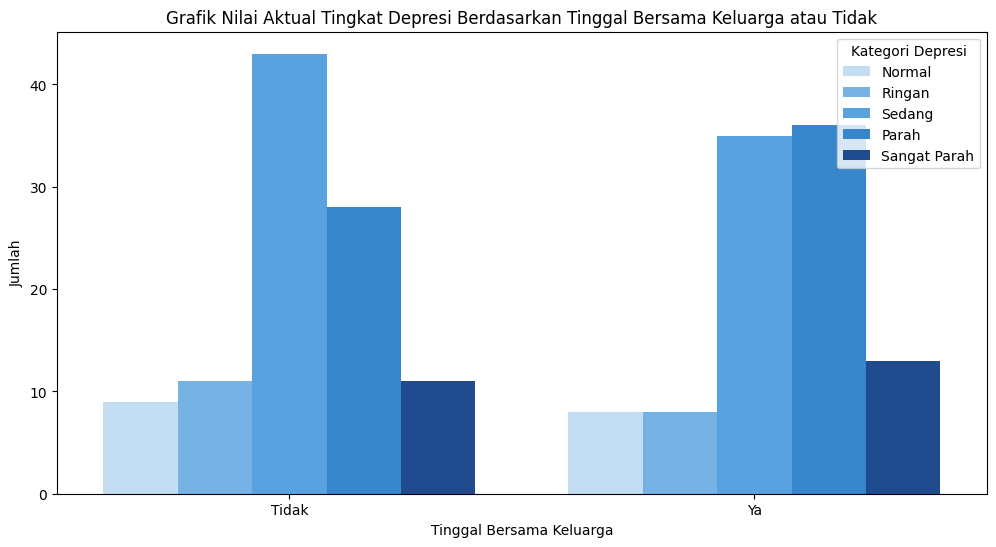

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru paling tua
}

# Grafik nilai aktual tingkat depresi berdasarkan tinggal bersama keluarga atau tidak
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='tinggal_dengan_keluarga', hue='kategori_depresi',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette=palette_colors)
plt.title('Grafik Nilai Aktual Tingkat Depresi Berdasarkan Tinggal Bersama Keluarga atau Tidak')
plt.xlabel('Tinggal Bersama Keluarga')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()


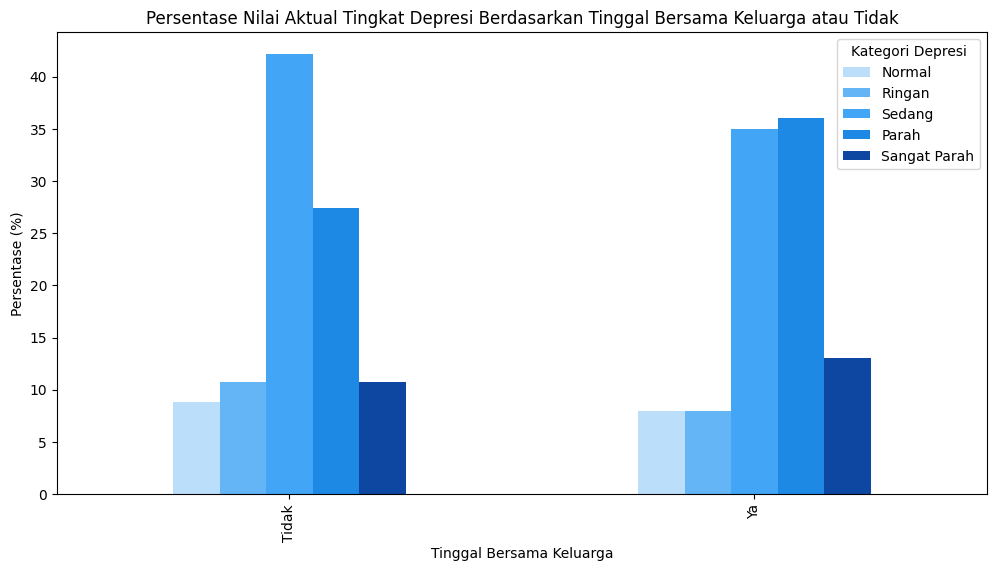

In [35]:
# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru paling tua
}

# Grafik nilai aktual tingkat depresi berdasarkan tinggal bersama keluarga atau tidak
# Menghitung persentase kategori aktual berdasarkan tinggal dengan keluarga atau tidak
data_actual_percent = data.groupby(['tinggal_dengan_keluarga', 'kategori_depresi']).size().unstack().fillna(0)
data_actual_percent = data_actual_percent.div(data_actual_percent.sum(axis=1), axis=0) * 100  # Konversi ke persentase

# Pastikan kategori urut dan semua kategori ada
data_actual_percent = data_actual_percent.reindex(columns=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'], fill_value=0)

# Plot hasil persentase dengan gradasi biru untuk nilai aktual
data_actual_percent.plot(kind='bar', stacked=False, figsize=(12, 6), color=[palette_colors[k] for k in ['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah']])
plt.title('Persentase Nilai Aktual Tingkat Depresi Berdasarkan Tinggal Bersama Keluarga atau Tidak')
plt.xlabel('Tinggal Bersama Keluarga')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik prediksi tingkat depresi berdasarkan tinggal bersama keluarga atau tidak

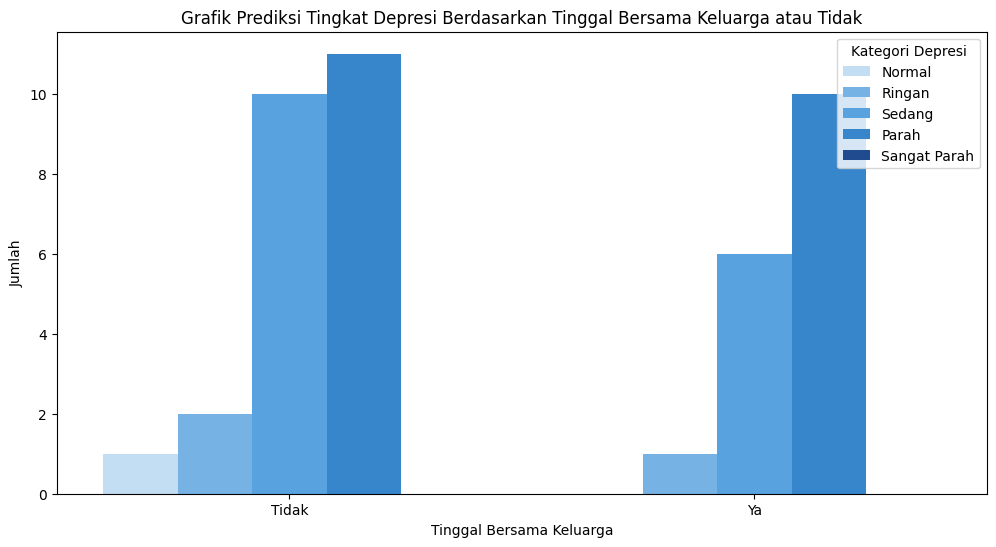

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan gradasi warna biru untuk setiap kategori
palette_colors = {
    'Normal': '#BBDEFB',       # Biru muda
    'Ringan': '#64B5F6',       # Biru sedikit lebih tua
    'Sedang': '#42A5F5',       # Biru sedang
    'Parah': '#1E88E5',        # Biru lebih tua
    'Sangat Parah': '#0D47A1'  # Biru paling tua
}

# Pastikan kolom 'tinggal_dengan_keluarga' termasuk dalam X saat memisahkan data
X = data[['skor_stres', 'skor_kecemasan', 'jenis_kelamin', 'angkatan', 'tinggal_dengan_keluarga']]
y = data['skor_depresi']

# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Latih model regresi linear
model = LinearRegression()
model.fit(X_train[['skor_stres', 'skor_kecemasan']], y_train)

# Memprediksi hasil pada data pengujian
y_pred = model.predict(X_test[['skor_stres', 'skor_kecemasan']])

# Gabungkan hasil prediksi dengan kolom lainnya di X_test
data_test = X_test.copy()
data_test['skor_depresi_aktual'] = y_test
data_test['skor_depresi_prediksi'] = y_pred

# Kategorikan prediksi
data_test['kategori_prediksi'] = data_test['skor_depresi_prediksi'].apply(kategori_depresi)

# Grafik prediksi tingkat depresi berdasarkan tinggal bersama keluarga atau tidak
plt.figure(figsize=(12, 6))
sns.countplot(data=data_test, x='tinggal_dengan_keluarga', hue='kategori_prediksi',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette=palette_colors)
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Tinggal Bersama Keluarga atau Tidak')
plt.xlabel('Tinggal Bersama Keluarga')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

In [37]:
# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Menampilkan persamaan regresi
print("Intercept (b0):", model.intercept_)
print("Coefficient for 'skor_stres' (b1):", model.coef_[0])
print("Coefficient for 'skor_kecemasan' (b2):", model.coef_[1])

Mean Absolute Error (MAE): 5.256242039725823
Mean Squared Error (MSE): 5.256242039725823
Root Mean Squared Error (RMSE): 6.1478451010071815
R-squared (R2): 0.20326200130631755
Intercept (b0): 6.931847336102816
Coefficient for 'skor_stres' (b1): 0.27443517246053795
Coefficient for 'skor_kecemasan' (b2): 0.35516248019402713


In [38]:
# Menampilkan persamaan regresi linier berganda
intercept = model.intercept_
coef_stres = model.coef_[0]
coef_kecemasan = model.coef_[1]

print(f"Persamaan regresi: y = {intercept:.2f} + ({coef_stres:.2f} * skor_stres) + ({coef_kecemasan:.2f} * skor_kecemasan)")

Persamaan regresi: y = 6.93 + (0.27 * skor_stres) + (0.36 * skor_kecemasan)


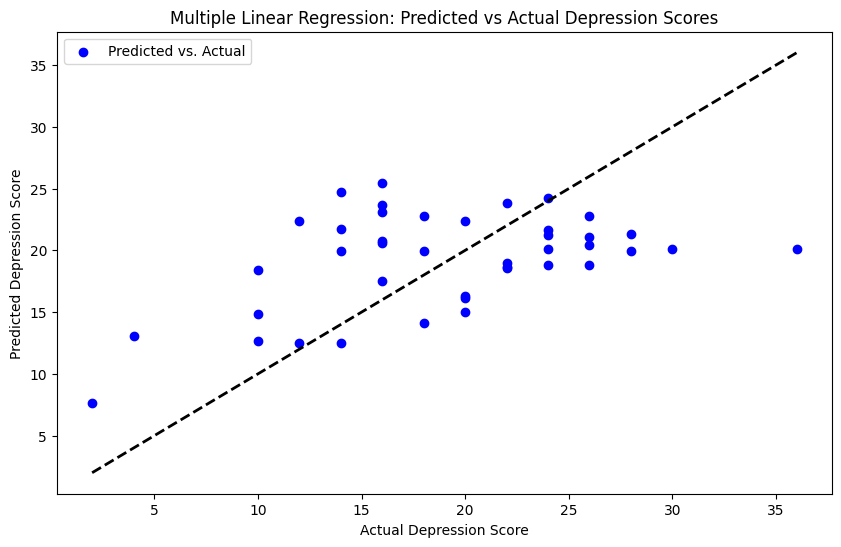

In [39]:
# Membuat scatter plot untuk memvisualisasikan hasil prediksi vs. nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Depression Score')
plt.ylabel('Predicted Depression Score')
plt.title('Multiple Linear Regression: Predicted vs Actual Depression Scores')
plt.legend()
plt.show()

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [41]:
# Inisialisasi model Random Forest dengan 100 pohon
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0)


In [42]:
print(X_train.head())
print(X_train.dtypes)


     skor_stres  skor_kecemasan jenis_kelamin  angkatan  \
70           22              24     Perempuan      2021   
30           20              28     Perempuan      2023   
117          20              20     Perempuan      2023   
173          14              24     Perempuan      2022   
67           18              14     Perempuan      2021   

    tinggal_dengan_keluarga  
70                    Tidak  
30                       Ya  
117                      Ya  
173                   Tidak  
67                    Tidak  
skor_stres                  int64
skor_kecemasan              int64
jenis_kelamin              object
angkatan                    int64
tinggal_dengan_keluarga    object
dtype: object


In [43]:
# Hapus kolom non-numerik yang tidak diperlukan dari X_train dan X_test
X_train = X_train[['skor_stres', 'skor_kecemasan']]
X_test = X_test[['skor_stres', 'skor_kecemasan']]

# Pastikan X_train dan X_test hanya berisi kolom numerik yang diperlukan
print(X_train.head())
print(X_train.dtypes)


     skor_stres  skor_kecemasan
70           22              24
30           20              28
117          20              20
173          14              24
67           18              14
skor_stres        int64
skor_kecemasan    int64
dtype: object


In [44]:
# Melatih model pada data pelatihan
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [45]:
# Prediksi hasil pada data uji
y_pred_rf = rf_model.predict(X_test)


In [46]:
# Evaluasi model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Regression:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared (R2):", r2_rf)


Random Forest Regression:
MAE: 4.781805617147081
MSE: 36.248560631059554
RMSE: 6.020677755125211
R-squared (R2): 0.23588194195411438


In [47]:
# Fungsi untuk mengklasifikasikan skor prediksi ke dalam kategori depresi
def kategori_depresi(skor):
    if skor <= 9:
        return 'Normal'
    elif skor <= 13:
        return 'Ringan'
    elif skor <= 20:
        return 'Sedang'
    elif skor <= 27:
        return 'Parah'
    else:
        return 'Sangat Parah'

# Terapkan fungsi kategori pada hasil prediksi Random Forest
data_test['kategori_prediksi_rf'] = pd.Series(y_pred_rf, index=data_test.index).apply(kategori_depresi)


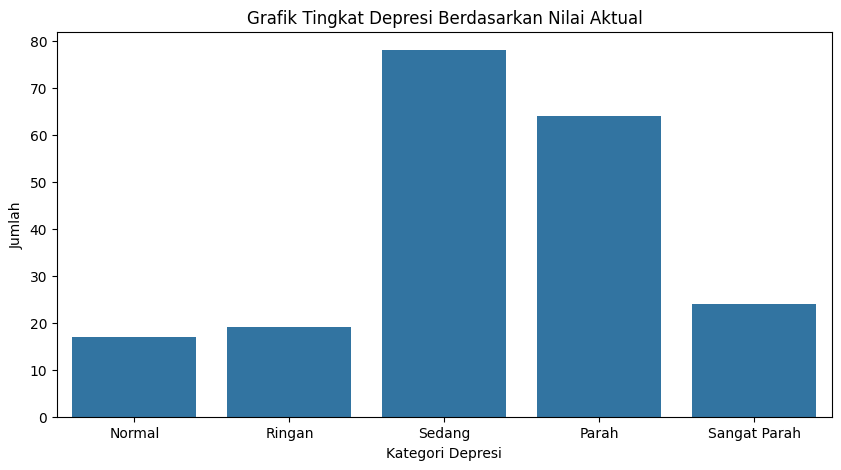

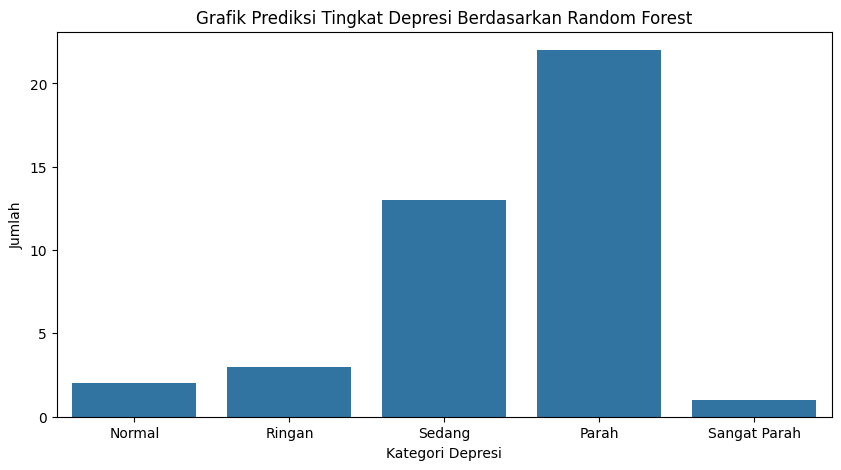

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot grafik tingkat depresi berdasarkan nilai aktual
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='kategori_depresi', order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'])
plt.title('Grafik Tingkat Depresi Berdasarkan Nilai Aktual')
plt.xlabel('Kategori Depresi')
plt.ylabel('Jumlah')
plt.show()

# Plot grafik prediksi tingkat depresi berdasarkan Random Forest
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='kategori_prediksi_rf', order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'])
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Random Forest')
plt.xlabel('Kategori Depresi')
plt.ylabel('Jumlah')
plt.show()


In [49]:
# Mendapatkan nilai kepentingan fitur di Random Forest
feature_importances_rf = rf_model.feature_importances_

# Menampilkan hasil dalam bentuk yang mudah dibaca
for feature, importance in zip(X_train.columns, feature_importances_rf):
    print(f"{feature}: {importance}")


skor_stres: 0.2892737103478094
skor_kecemasan: 0.7107262896521905


# Gradient Boosting 

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [51]:
# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)


In [52]:
# Melatih model pada data pelatihan
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [53]:
# Prediksi hasil pada data uji
y_pred_gb = gb_model.predict(X_test)


In [54]:
# Evaluasi model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Menampilkan hasil evaluasi
print("Gradient Boosting Regression:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R-squared (R2):", r2_gb)


Gradient Boosting Regression:
MAE: 4.363450271765399
MSE: 29.01183955166987
RMSE: 5.386263969735411
R-squared (R2): 0.38843170286971995


In [55]:
# Fungsi untuk mengklasifikasikan skor prediksi ke dalam kategori depresi
def kategori_depresi(skor):
    if skor <= 9:
        return 'Normal'
    elif skor <= 13:
        return 'Ringan'
    elif skor <= 20:
        return 'Sedang'
    elif skor <= 27:
        return 'Parah'
    else:
        return 'Sangat Parah'

# Tambahkan kategori prediksi ke data uji
data_test['kategori_prediksi_gb'] = pd.Series(y_pred_gb, index=data_test.index).apply(kategori_depresi)


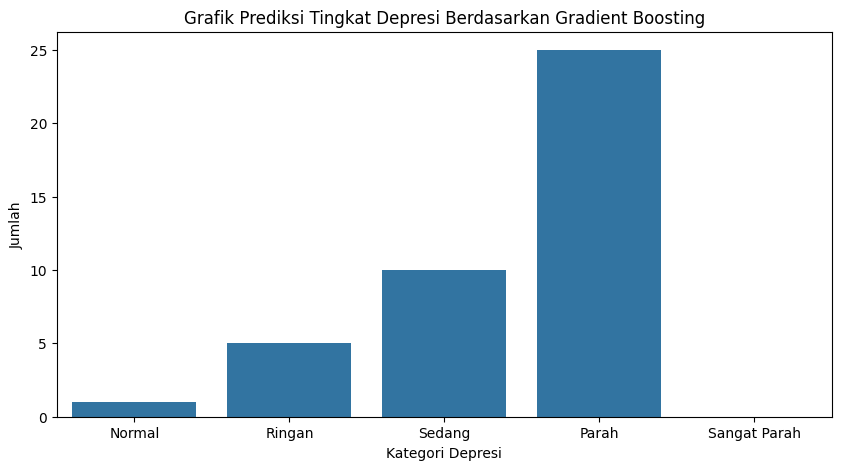

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi kategori berdasarkan hasil prediksi Gradient Boosting
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='kategori_prediksi_gb', order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'])
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Gradient Boosting')
plt.xlabel('Kategori Depresi')
plt.ylabel('Jumlah')
plt.show()


Berdasarkan semua metrik, Gradient Boosting Regression adalah model terbaik di antara ketiganya, karena memiliki:

Kesalahan prediksi paling rendah (MAE, MSE, RMSE).
Nilai R² tertinggi, menunjukkan kemampuannya yang lebih baik dalam menjelaskan variasi data.
Rekomendasi: Gunakan Gradient Boosting Regression untuk mendapatkan hasil prediksi yang lebih akurat pada data ini.

Tabel Evaluasi Model:


,Model,MAE,RMSE,R2
0,Regresi Linier Berganda,5.256242,6.147845,0.203262
1,Random Forest,4.781806,6.020678,0.235882
2,Gradient Boosting,4.363450,5.386264,0.388432


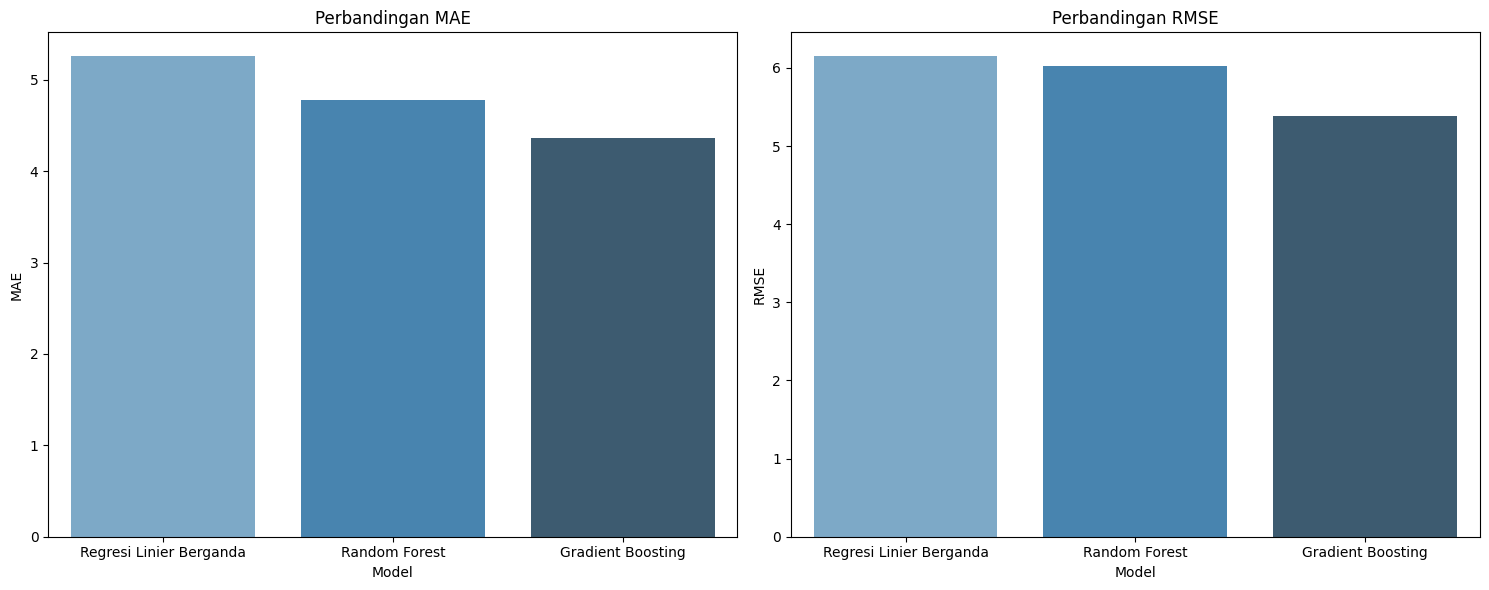

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simpan hasil evaluasi dari model-model yang sudah Anda jalankan
evaluasi_model = {
    "Model": ["Regresi Linier Berganda", "Random Forest", "Gradient Boosting"],
    "MAE": [mae, mae_rf, mae_gb],
    "RMSE": [rmse, rmse_rf, rmse_gb],
    "R2": [r2, r2_rf, r2_gb]
}

# Konversi ke DataFrame
df_evaluasi = pd.DataFrame(evaluasi_model)

# Tampilkan tabel evaluasi
print("Tabel Evaluasi Model:")
display(df_evaluasi)

# Plot grafik MAE dan RMSE untuk ketiga model
plt.figure(figsize=(15, 6))

# Plot MAE
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MAE", data=df_evaluasi, hue="Model", dodge=False, palette="Blues_d")
plt.title("Perbandingan MAE")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.legend([],[], frameon=False)  # Hapus legenda jika tidak diperlukan

# Plot RMSE
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="RMSE", data=df_evaluasi, hue="Model", dodge=False, palette="Blues_d")
plt.title("Perbandingan RMSE")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.legend([],[], frameon=False)  # Hapus legenda jika tidak diperlukan

plt.tight_layout()
plt.show()


In [58]:
# Mendapatkan nilai kepentingan fitur di Gradient Boosting
feature_importances_gb = gb_model.feature_importances_

# Menampilkan hasil dalam bentuk yang mudah dibaca
for feature, importance in zip(X_train.columns, feature_importances_gb):
    print(f"{feature}: {importance}")


skor_stres: 0.22416705625935054
skor_kecemasan: 0.7758329437406495


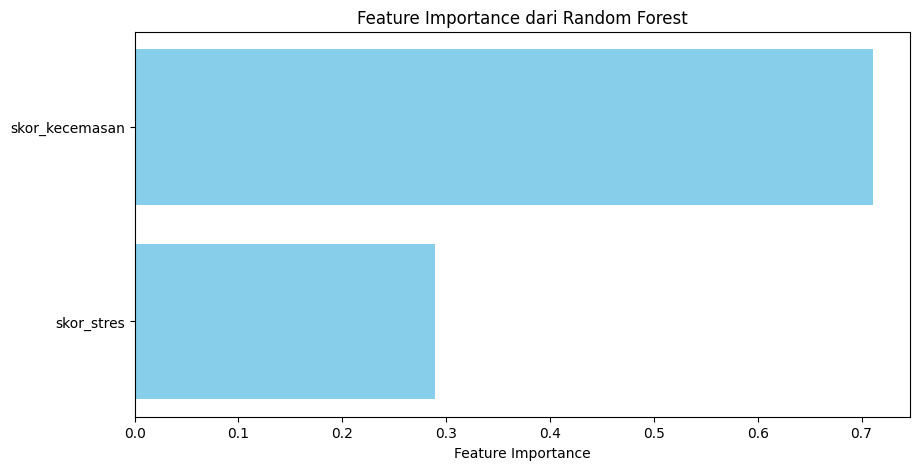

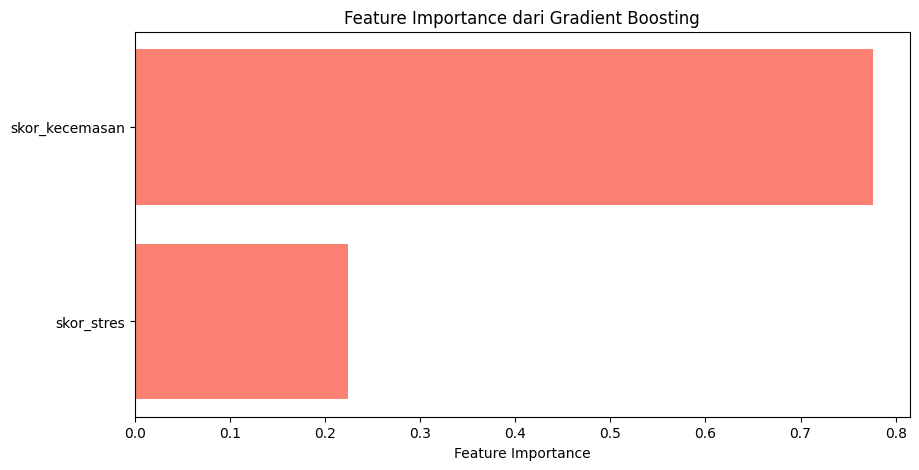

In [59]:
import matplotlib.pyplot as plt

# Membuat plot untuk Random Forest
plt.figure(figsize=(10, 5))
plt.barh(X_train.columns, feature_importances_rf, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance dari Random Forest')
plt.show()

# Membuat plot untuk Gradient Boosting
plt.figure(figsize=(10, 5))
plt.barh(X_train.columns, feature_importances_gb, color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance dari Gradient Boosting')
plt.show()


Kedua model menunjukkan bahwa skor_kecemasan adalah fitur yang lebih berpengaruh dibandingkan dengan skor_stres dalam memprediksi tingkat depresi.

# Grafik Tingkatan Depresi Berdasarkan Angkatan dengan Metode Gradient Boosting

In [60]:
# Pisahkan variabel independen (termasuk angkatan) dan dependen
X = data[['skor_stres', 'skor_kecemasan', 'angkatan']]  # Sertakan angkatan
y = data['skor_depresi']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
# Latih model Gradient Boosting
gb_model.fit(X_train[['skor_stres', 'skor_kecemasan']], y_train)

# Prediksi dengan model Gradient Boosting
y_pred_gb = gb_model.predict(X_test[['skor_stres', 'skor_kecemasan']])

# Menyimpan prediksi dan kategori ke dalam data_test
data_test = X_test.copy()  # Salin X_test yang berisi kolom 'angkatan'
data_test['kategori_depresi_aktual'] = y_test.apply(kategori_depresi)
data_test['kategori_prediksi_gb'] = pd.Series(y_pred_gb, index=X_test.index).apply(kategori_depresi)


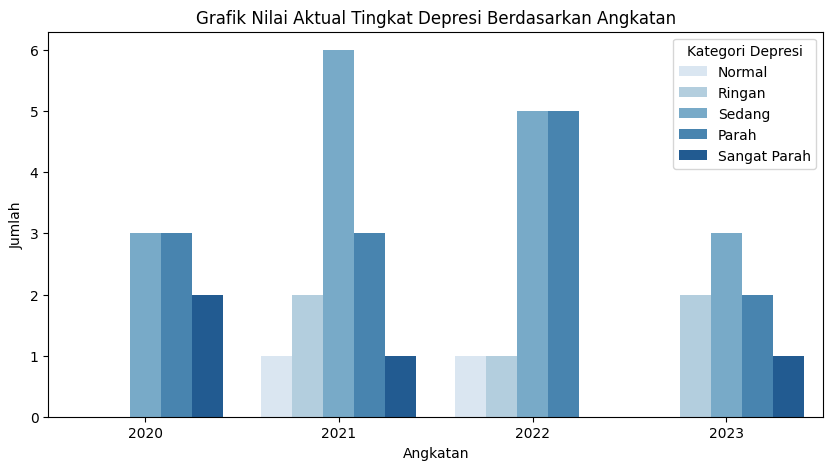

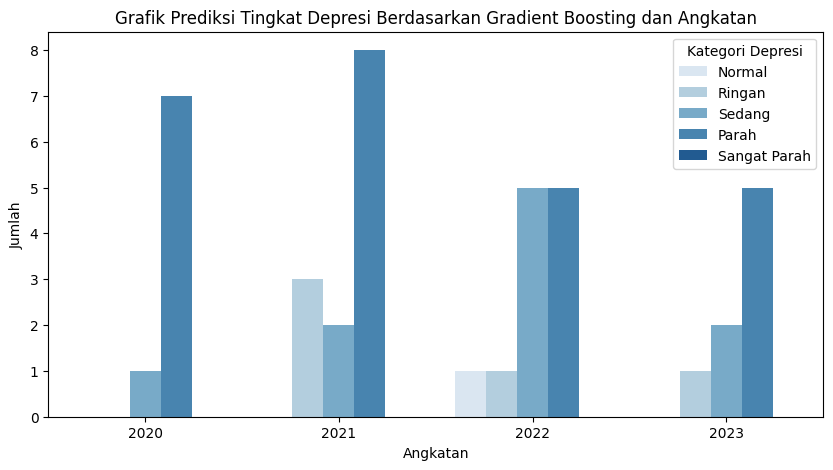

In [62]:
# Plot grafik nilai aktual berdasarkan angkatan
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='angkatan', hue='kategori_depresi_aktual',
              order=sorted(data_test['angkatan'].unique()),
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette='Blues')
plt.title('Grafik Nilai Aktual Tingkat Depresi Berdasarkan Angkatan')
plt.xlabel('Angkatan')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Plot grafik prediksi berdasarkan Gradient Boosting
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='angkatan', hue='kategori_prediksi_gb',
              order=sorted(data_test['angkatan'].unique()),
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette='Blues')
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Gradient Boosting dan Angkatan')
plt.xlabel('Angkatan')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik Tingkatan Depresi Berdasarkan Jenis Kelamin dengan Metode Gradient Boosting

In [63]:
# Menambahkan kolom jenis_kelamin ke X (pastikan sudah tersedia sebelumnya)
X = data[['skor_stres', 'skor_kecemasan', 'jenis_kelamin']]  # Tambahkan kolom 'jenis_kelamin' untuk keperluan grafik
y = data['skor_depresi']

# Memisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi dan latih model Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train[['skor_stres', 'skor_kecemasan']], y_train)

# Prediksi dengan Gradient Boosting
y_pred_gb = gb_model.predict(X_test[['skor_stres', 'skor_kecemasan']])

# Simpan prediksi dan kategori ke dalam data_test
data_test = X_test.copy()  # Salin X_test yang berisi kolom 'jenis_kelamin'
data_test['kategori_depresi_aktual'] = y_test.apply(kategori_depresi)
data_test['kategori_prediksi_gb'] = pd.Series(y_pred_gb, index=X_test.index).apply(kategori_depresi)


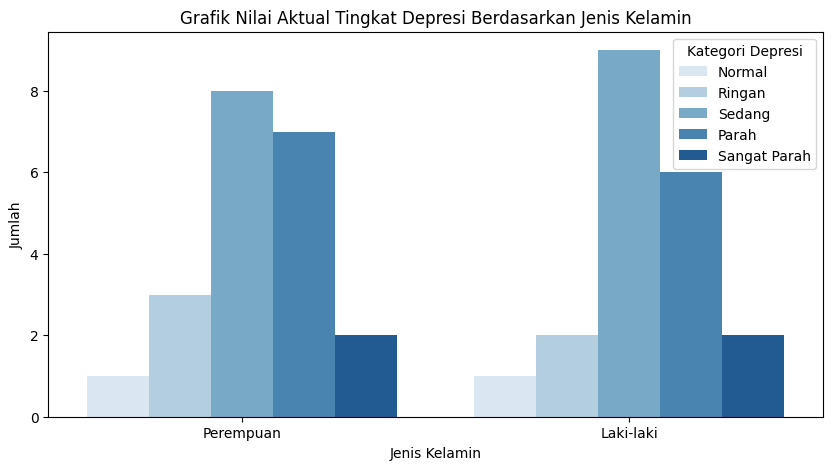

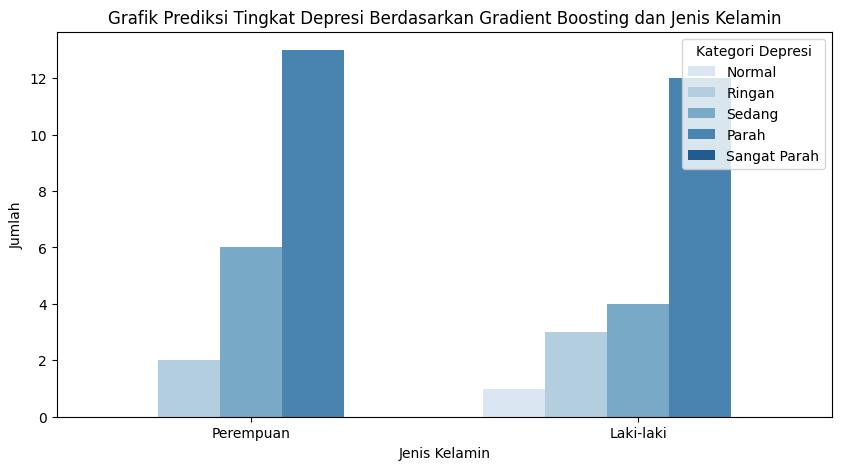

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik Nilai Aktual Berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='jenis_kelamin', hue='kategori_depresi_aktual',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette='Blues')
plt.title('Grafik Nilai Aktual Tingkat Depresi Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik Prediksi Berdasarkan Gradient Boosting Berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='jenis_kelamin', hue='kategori_prediksi_gb',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette='Blues')
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Gradient Boosting dan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()


# Grafik Tingkatan Depresi Berdasarkan Tinggal Bersama Keluarga atau Tidak dengan Metode Gradient Boosting

In [66]:
# Menambahkan kolom tinggal_dengan_keluarga ke X (pastikan sudah tersedia sebelumnya)
X = data[['skor_stres', 'skor_kecemasan', 'tinggal_dengan_keluarga']]  # Tambahkan kolom 'tinggal_dengan_keluarga' untuk keperluan grafik
y = data['skor_depresi']

# Memisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [67]:
from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi dan latih model Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train[['skor_stres', 'skor_kecemasan']], y_train)

# Prediksi dengan Gradient Boosting
y_pred_gb = gb_model.predict(X_test[['skor_stres', 'skor_kecemasan']])

# Simpan prediksi dan kategori ke dalam data_test
data_test = X_test.copy()  # Salin X_test yang berisi kolom 'tinggal_dengan_keluarga'
data_test['kategori_depresi_aktual'] = y_test.apply(kategori_depresi)
data_test['kategori_prediksi_gb'] = pd.Series(y_pred_gb, index=X_test.index).apply(kategori_depresi)


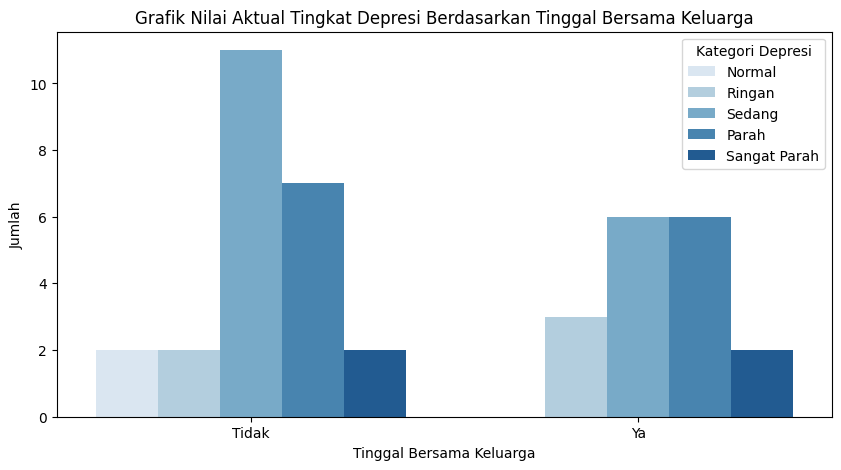

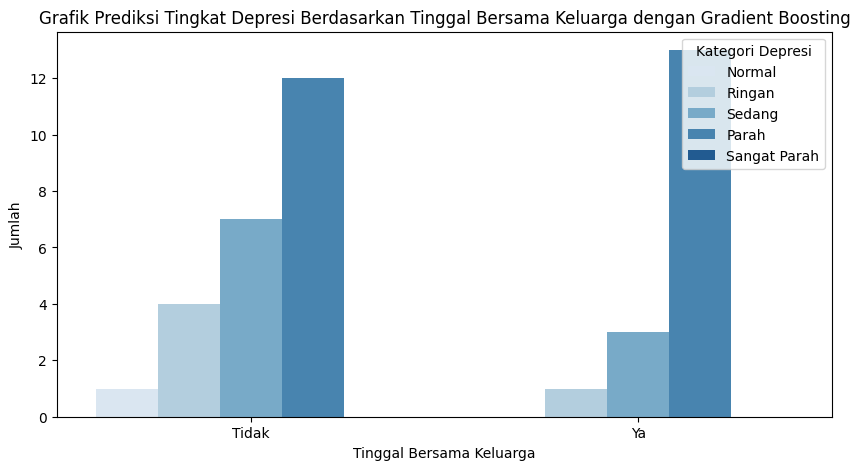

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik Nilai Aktual Berdasarkan Tinggal Bersama Keluarga atau Tidak
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='tinggal_dengan_keluarga', hue='kategori_depresi_aktual',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette='Blues')
plt.title('Grafik Nilai Aktual Tingkat Depresi Berdasarkan Tinggal Bersama Keluarga')
plt.xlabel('Tinggal Bersama Keluarga')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()

# Grafik Prediksi Berdasarkan Gradient Boosting dan Tinggal Bersama Keluarga atau Tidak
plt.figure(figsize=(10, 5))
sns.countplot(data=data_test, x='tinggal_dengan_keluarga', hue='kategori_prediksi_gb',
              hue_order=['Normal', 'Ringan', 'Sedang', 'Parah', 'Sangat Parah'],
              palette='Blues')
plt.title('Grafik Prediksi Tingkat Depresi Berdasarkan Tinggal Bersama Keluarga dengan Gradient Boosting')
plt.xlabel('Tinggal Bersama Keluarga')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Depresi', loc='upper right')
plt.show()


In [69]:
data.to_csv("responden_bersih.csv", index=False)
